# Project: Book Recommendation System

# Project's Workflow:
1. Data exploration
2. Data Proprocessing
3. Exploratory data analysis
4. Building model
5. Testing model
5. Evaluation of model

# 1. Data Exploration:

In [11]:
# Importing necessary libraries

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Importing Dataset

In [14]:
data = pd.read_csv("D:\\ineuron\\Book_recommendation\\dataset\\books_new.csv")
data.head()

,Title,Author,Genre,SubGenre,Height,Publisher
0,Fundamentals of Wavelets,"Goswami, Jaideva",tech,signal_processing,228,Wiley
1,Data Smart,"Foreman, John",tech,data_science,235,Wiley
2,God Created the Integers,"Hawking, Stephen",tech,mathematics,197,Penguin
3,Superfreakonomics,"Dubner, Stephen",science,economics,179,HarperCollins
4,Orientalism,"Said, Edward",nonfiction,history,197,Penguin


# Data Preproccessing

In [15]:
data.isnull().sum()

Title         0
Author       24
Genre         0
SubGenre      0
Height        0
Publisher    96
dtype: int64

In [16]:
data.shape

(211, 6)

In [17]:
# The above data shows there are 211 rows. And as per our requirement the columns['Author','Height','Publisher','SubGenre'] do not need.

In [18]:
data = data.drop(['Author','Height','Publisher','SubGenre'],axis=1)

In [19]:
data.head()

,Title,Genre
0,Fundamentals of Wavelets,tech
1,Data Smart,tech
2,God Created the Integers,tech
3,Superfreakonomics,science
4,Orientalism,nonfiction


In [20]:
data.duplicated().sum()

1

# 3. Exploratory Data Analysis

In [21]:
data.head()

,Title,Genre
0,Fundamentals of Wavelets,tech
1,Data Smart,tech
2,God Created the Integers,tech
3,Superfreakonomics,science
4,Orientalism,nonfiction


In [22]:
data['Genre'].value_counts()

fiction       77
nonfiction    58
tech          36
science       23
philosophy    17
Name: Genre, dtype: int64

In [28]:
genre_counts = data['Genre'].value_counts()

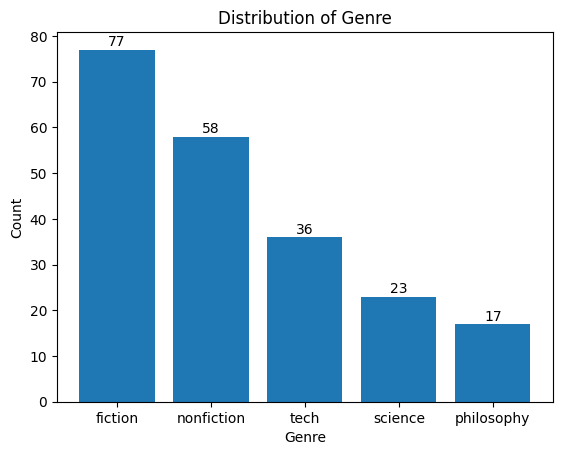

In [30]:
plt.bar(genre_counts.index,genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title("Distribution of Genre")
for i, count in enumerate(genre_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.show()

In [33]:
data['Title'].value_counts()

Angels & Demons                          2
Fundamentals of Wavelets                 1
Superman Earth One - 1                   1
Pattern Classification                   1
From Beirut to Jerusalem                 1
                                        ..
Last Mughal, The                         1
Social Choice & Welfare, Vol 39 No. 1    1
Radiowaril Bhashane & Shrutika           1
Gun Gayin Awadi                          1
Christmas Carol, A                       1
Name: Title, Length: 210, dtype: int64

# 4.Building Model

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [36]:
# Applying TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['Genre'])

In [37]:
# Computing similarity
similarity = linear_kernel(tfidf_matrix,tfidf_matrix)

In [51]:
# Recommendations
def get_recommendation(title, cosine_sim=similarity):
    index = data[data['Title']==title].index[0]
    score = list(enumerate(similarity[index]))
    score = sorted(score,key=lambda x:x[1],reverse=True)[1:4]
    book_indices = [i[0] for i in score]
    return data['Title'].iloc[book_indices]

# 5. Testing model

In [55]:
#Getting recommendation
book_title = "Superfreakonomics"
recommendation = get_recommendation(book_title)
print("Recommnedation for",book_title,":")
print(recommendation)

Recommnedation for Superfreakonomics :
7       Drunkard's Walk, The
12        Birth of a Theorem
30    Wealth of Nations, The
Name: Title, dtype: object
